## IMR Crash Data Analysis
#### Author: Eric Englin

In [2]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib.ticker import PercentFormatter
import numpy as np
import math
import seaborn as sns
import os

ModuleNotFoundError: No module named 'geopandas'

In [4]:
myworkingdirectory = r"C:\Users\eric.englin\Desktop\TSP" 
os.chdir(myworkingdirectory)

In [5]:
crash_df = pd.read_csv("./crash_data_joined.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3296: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
crash_df.head()

,INCID_NO,CASENUM,NUM_OCC,Non-Collision,Collision with Other Motor Vehicle,Collision with Fixed Object,Collision with Pedestrian,Collision with Bicycle,Collision with Parked Motor Vehicle,Collision with Railway Train,...,CRASH_TIME,LATITUDE,LONGITUDE,FATALS,INJURED,Data_Origin,UNIT_NAME,REGION,UNIT_TYPE,_merge
0,ABLI9000000001,0,0.0,0,0,0,0,0,1,0,...,1115.0,0.0,0.0,0.0,0.0,STARS,Abraham Lincoln Birthplace National Historical...,SE,National Historical Park,both
1,ABLI9100000001,0,2.0,0,0,1,0,0,0,0,...,1400.0,0.0,0.0,0.0,0.0,STARS,Abraham Lincoln Birthplace National Historical...,SE,National Historical Park,both
2,ACAD0000000003,0,1.0,0,0,1,0,0,0,0,...,800.0,0.0,0.0,0.0,0.0,STARS,Acadia National Park,NE,National Park,both
3,ACAD0000000014,0,2.0,0,0,1,0,0,0,0,...,1310.0,0.0,0.0,0.0,0.0,STARS,Acadia National Park,NE,National Park,both
4,ACAD0000000026,0,1.0,0,0,1,0,0,0,0,...,1840.0,0.0,0.0,0.0,0.0,STARS,Acadia National Park,NE,National Park,both


In [7]:
crash_df.columns

Index(['INCID_NO', 'CASENUM', 'NUM_OCC', 'Non-Collision',
       'Collision with Other Motor Vehicle', 'Collision with Fixed Object',
       'Collision with Pedestrian', 'Collision with Bicycle',
       'Collision with Parked Motor Vehicle', 'Collision with Railway Train',
       'Collision with Animal', 'Collision with Other Object',
       'Collision with Unknown', 'Other Accident Class', 'No Injury',
       'Possible Injury', 'Non-incapacitating Injury', 'Incapacitating Injury',
       'Fatality', 'Unknown Injury', 'PARK_ALPHA', 'STATE', 'CRASH_DATE',
       'CRASH_TIME', 'LATITUDE', 'LONGITUDE', 'FATALS', 'INJURED',
       'Data_Origin', 'UNIT_NAME', 'REGION', 'UNIT_TYPE', '_merge'],
      dtype='object')

In [8]:
crash_df['CRASH_DATE']=pd.to_datetime(crash_df['CRASH_DATE'])
crash_df['day_of_week'] = crash_df['CRASH_DATE'].dt.day_name
crash_df['year'] = crash_df['CRASH_DATE'].dt.year

In [9]:
crash_df['Number of Crashes']= 1
df_year_origin_park=crash_df.groupby(['Data_Origin', "year", 'REGION','UNIT_NAME']).sum()
df_year_origin_park=df_year_origin_park.reset_index()
df_year_origin_park=df_year_origin_park.drop(columns = ['LATITUDE', 'LONGITUDE'])

df_year_origin_park.to_csv("Crash_Data_Park_Level.csv",index=False)

In [10]:
numNoneTypebyRow=crash_df.isnull().sum(axis=1).tolist()
numNoneTypebyColumn=crash_df.isnull().sum(axis=0).tolist()
x=len(numNoneTypebyRow)
y=len(numNoneTypebyColumn)
fullRow=0
fullCol=0
for element in numNoneTypebyRow:
    if element==0:
        fullRow=fullRow+1
for element in numNoneTypebyColumn:
    if element==0:
        fullCol=fullCol+1
print('Total Number of Rows', x)
print('Number of Full Rows',fullRow)
print('Total Number of Columns', y)
print('Number of Full Columns',fullCol)

Total Number of Rows 212957
Number of Full Rows 90111
Total Number of Columns 36
Number of Full Columns 15


In [11]:
percentIncomplete=[]
for element in numNoneTypebyRow:
    percentIncomplete.append(element/58)

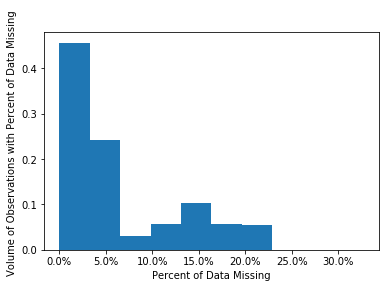

In [12]:
plt.hist(percentIncomplete, weights=np.ones(len(percentIncomplete)) / len(percentIncomplete))
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel('Percent of Data Missing')
plt.ylabel('Volume of Observations with Percent of Data Missing ')
plt.show()

In [13]:
crash_df.columns

Index(['INCID_NO', 'CASENUM', 'NUM_OCC', 'Non-Collision',
       'Collision with Other Motor Vehicle', 'Collision with Fixed Object',
       'Collision with Pedestrian', 'Collision with Bicycle',
       'Collision with Parked Motor Vehicle', 'Collision with Railway Train',
       'Collision with Animal', 'Collision with Other Object',
       'Collision with Unknown', 'Other Accident Class', 'No Injury',
       'Possible Injury', 'Non-incapacitating Injury', 'Incapacitating Injury',
       'Fatality', 'Unknown Injury', 'PARK_ALPHA', 'STATE', 'CRASH_DATE',
       'CRASH_TIME', 'LATITUDE', 'LONGITUDE', 'FATALS', 'INJURED',
       'Data_Origin', 'UNIT_NAME', 'REGION', 'UNIT_TYPE', '_merge',
       'day_of_week', 'year', 'Number of Crashes'],
      dtype='object')

In [14]:
crash_df.REGION.value_counts()

NC    34978
IM    34876
SE    21212
PW    21155
NE    19159
NT     8464
MW     2681
AK      609
Name: REGION, dtype: int64

In [15]:
crash_df.INJURED.sum(),crash_df.FATALS.sum(), crash_df.Fatality.sum(), len(crash_df)

(67956.0, 1591.0, 980.0, 212957)

In [16]:
crash_df_IMR = crash_df.loc[crash_df['REGION']=="IM"]


In [17]:
crash_df_IMR.INJURED.sum(),crash_df_IMR.FATALS.sum(), crash_df_IMR.Fatality.sum()

(6726.0, 180.0, 147.0)

In [19]:
crash_df_IMR_IMARS = crash_df_IMR.loc[crash_df_IMR['Data_Origin']=='IMARS']
crash_df_IMR_IMARS.loc[crash_df_IMR_IMARS['Fatality']>0]

,INCID_NO,CASENUM,NUM_OCC,Non-Collision,Collision with Other Motor Vehicle,Collision with Fixed Object,Collision with Pedestrian,Collision with Bicycle,Collision with Parked Motor Vehicle,Collision with Railway Train,...,FATALS,INJURED,Data_Origin,UNIT_NAME,REGION,UNIT_TYPE,_merge,day_of_week,year,Number of Crashes
205328,NP16098346,0,18.0,0,1,0,0,0,0,0,...,6.0,6.0,IMARS,Yellowstone National Park,IM,National Park,both,<bound method PandasDelegate._add_delegate_acc...,2016.0,1
205377,NP16114077,0,19.0,0,1,0,0,0,0,0,...,6.0,0.0,IMARS,Yellowstone National Park,IM,National Park,both,<bound method PandasDelegate._add_delegate_acc...,2016.0,1
207390,NP18114735,0,1.0,0,0,1,0,0,0,0,...,1.0,0.0,IMARS,Glacier National Park,IM,National Park,both,<bound method PandasDelegate._add_delegate_acc...,2018.0,1
207420,NP19071442,0,3.0,1,0,0,0,0,0,0,...,1.0,1.0,IMARS,Glacier National Park,IM,National Park,both,<bound method PandasDelegate._add_delegate_acc...,2019.0,1
207455,NP19129572,0,5.0,0,0,0,0,0,0,0,...,1.0,2.0,IMARS,Glacier National Park,IM,National Park,both,<bound method PandasDelegate._add_delegate_acc...,2019.0,1
209335,NP19003845,0,2.0,0,1,0,0,0,0,0,...,1.0,1.0,IMARS,Yellowstone National Park,IM,National Park,both,<bound method PandasDelegate._add_delegate_acc...,2019.0,1
209435,NP19120658,0,1.0,1,0,0,0,0,0,0,...,1.0,0.0,IMARS,Yellowstone National Park,IM,National Park,both,<bound method PandasDelegate._add_delegate_acc...,2019.0,1


In [20]:
len(crash_df_IMR.loc[crash_df_IMR['Data_Origin']=='IMARS']), \
len(crash_df_IMR.loc[crash_df_IMR['Data_Origin']=='CDS']), \
len(crash_df_IMR.loc[crash_df_IMR['Data_Origin']=='STARS'])

(1798, 9654, 23424)

In [21]:
len(crash_df_IMR.loc[crash_df_IMR['Data_Origin']=='IMARS']['PARK_ALPHA'].unique()), \
len(crash_df_IMR.loc[crash_df_IMR['Data_Origin']=='CDS']['PARK_ALPHA'].unique()), \
len(crash_df_IMR.loc[crash_df_IMR['Data_Origin']=='STARS']['PARK_ALPHA'].unique()), 

(41, 31, 55)

In [22]:
df_year_origin=crash_df.groupby(['Data_Origin', "year"]).sum()
df_year_origin=df_year_origin.reset_index()
#df_year_origin=df_year_origin[['CATEGORY','# Crash']].sort_values(by='CATEGORY')
#df_type_grouped.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_year_origin

,Data_Origin,year,NUM_OCC,Non-Collision,Collision with Other Motor Vehicle,Collision with Fixed Object,Collision with Pedestrian,Collision with Bicycle,Collision with Parked Motor Vehicle,Collision with Railway Train,...,Non-incapacitating Injury,Incapacitating Injury,Fatality,Unknown Injury,CRASH_TIME,LATITUDE,LONGITUDE,FATALS,INJURED,Number of Crashes
0,CDS,1920.0,0.0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,1959.0,0.00000,0.00000,0.0,0.0,1
1,CDS,1930.0,0.0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1330.0,36.95588,-80.15845,0.0,1.0,1
2,CDS,1931.0,0.0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1552.0,37.66201,-119.71023,0.0,0.0,1
3,CDS,1940.0,0.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1940.0,48.51074,-113.98629,0.0,0.0,1
4,CDS,1944.0,0.0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,1610.0,37.74620,-119.58335,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,STARS,2003.0,15807.0,492,2614,1603,39,33,247,2,...,695.0,281.0,42.0,15.0,8070539.0,0.00000,0.00000,42.0,1916.0,6018
70,STARS,2004.0,15670.0,498,2789,1561,36,41,234,1,...,660.0,278.0,60.0,19.0,8066523.0,0.00000,0.00000,60.0,1862.0,6128
71,STARS,2005.0,13544.0,463,2502,1370,32,29,228,0,...,543.0,250.0,42.0,25.0,7278914.0,0.00000,0.00000,42.0,1626.0,5473
72,STARS,2006.0,9751.0,256,1953,933,19,35,96,0,...,418.0,156.0,32.0,1.0,4853509.0,0.00000,0.00000,32.0,1280.0,3722


In [23]:
cds_year = df_year_origin.loc[df_year_origin['Data_Origin']=='CDS']
imars_year = df_year_origin.loc[df_year_origin['Data_Origin']=='IMARS']
stars_year = df_year_origin.loc[df_year_origin['Data_Origin']=='STARS']

In [24]:
prmp_years = [*range(2007, 2020, 1)]
prmp_fatals = [35,32,31,35,28,29,29,47,58,58,60,56,72]

prmp_df = pd.DataFrame({
    'year':prmp_years,
    'FATALS':prmp_fatals
})

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is dep

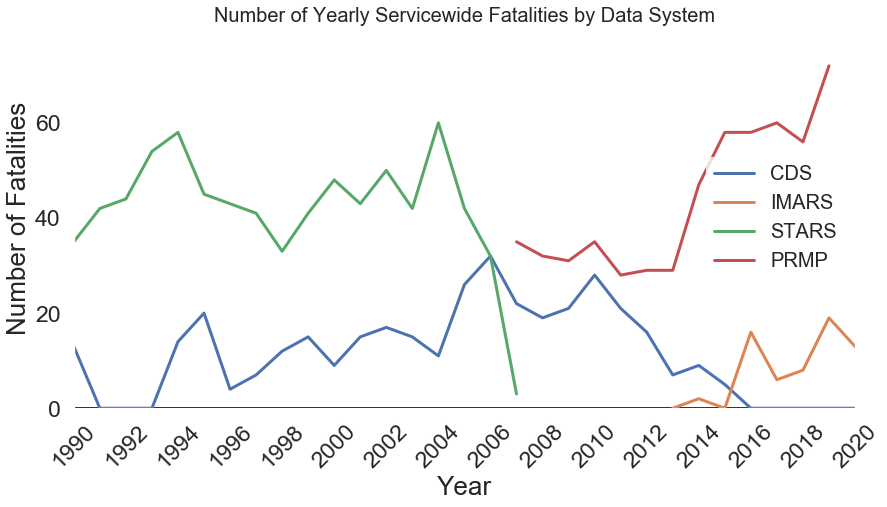

In [27]:
import matplotlib.ticker as ticker
plt.style.use('seaborn')
tick_spacing = 2 
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
fig,ax = plt.subplots(1,1, figsize=(14, 7))

ax.set_title('Number of Yearly Servicewide Fatalities by Data System', fontsize=20)
ax.plot(cds_year["year"], cds_year['FATALS'], label = 'CDS', linewidth = 3)
ax.plot(imars_year["year"], imars_year['FATALS'], label = 'IMARS', linewidth = 3)
ax.plot(stars_year["year"], stars_year['FATALS'], label = 'STARS', linewidth = 3)
ax.plot(prmp_df["year"], prmp_df['FATALS'], label = 'PRMP', linewidth = 3)

legend = plt.legend(frameon = 2,fontsize=20)
frame = legend.get_frame()
frame.set_color('white')
frame.set_facecolor('white')
frame.set_edgecolor('black')
plt.xlim([1990,2020])
plt.ylim([0,80])
ax.set_yticks([0,20,40,60])
ax.grid('off')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=23, rotation=45)
ax.tick_params(axis='y', which='major', labelsize=23)
ax.tick_params(axis='both', which='minor', labelsize=23)
ax.hlines(0, xmin = 1990, xmax = 2020, linewidth = 3)
ax.set_xlabel("Year", fontsize=26)
ax.set_ylabel("Number of Fatalities", fontsize=26)

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is dep

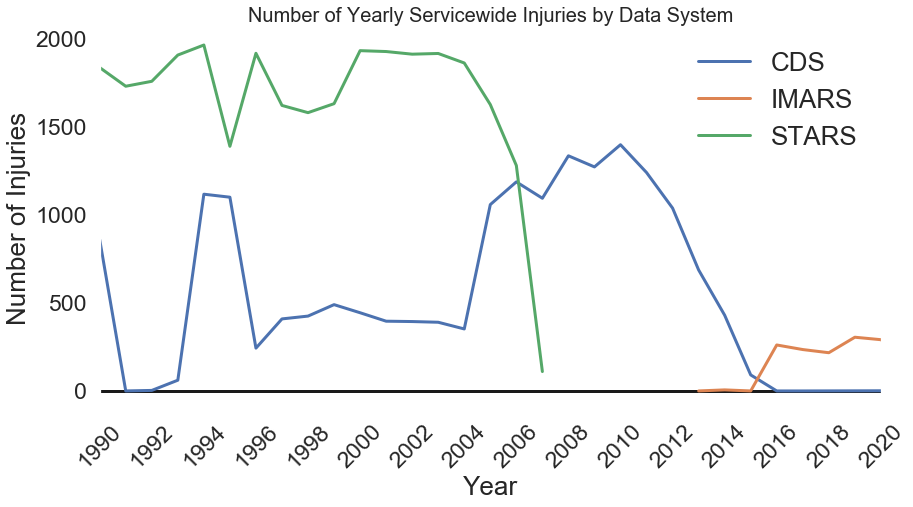

In [71]:
import matplotlib.ticker as ticker
plt.style.use('seaborn')
tick_spacing = 2 
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
fig,ax = plt.subplots(1,1, figsize=(14, 7))

ax.set_title('Number of Yearly Servicewide Injuries by Data System', fontsize=20)
ax.plot(cds_year["year"], cds_year['INJURED'], label = 'CDS', linewidth = 3)
ax.plot(imars_year["year"], imars_year['INJURED'], label = 'IMARS', linewidth = 3)
ax.plot(stars_year["year"], stars_year['INJURED'], label = 'STARS', linewidth = 3)
legend = plt.legend(frameon = 1,fontsize=26)
frame = legend.get_frame()
frame.set_color('white')
frame.set_facecolor('white')
frame.set_edgecolor('black')
plt.xlim([1990,2020])
ax.grid('off')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=23, rotation=45)
ax.tick_params(axis='y', which='major', labelsize=23)
ax.tick_params(axis='both', which='minor', labelsize=23)
ax.hlines(0, xmin = 1990, xmax = 2020, linewidth = 3)
ax.set_xlabel("Year", fontsize=26)
ax.set_ylabel("Number of Injuries", fontsize=26)


plt.show()

In [63]:
df_year_origin_count=crash_df[['Data_Origin', "year",'INCID_NO']].groupby(['Data_Origin', "year"]).count()
df_year_origin_count=df_year_origin_count.reset_index()

cds_year_count = df_year_origin_count.loc[df_year_origin_count['Data_Origin']=='CDS']
imars_year_count = df_year_origin_count.loc[df_year_origin_count['Data_Origin']=='IMARS']
stars_year_count = df_year_origin_count.loc[df_year_origin_count['Data_Origin']=='STARS']

#df_year_origin=df_year_origin[['CATEGORY','# Crash']].sort_values(by='CATEGORY')
#df_type_grouped.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
#df_year_origin_count

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is dep

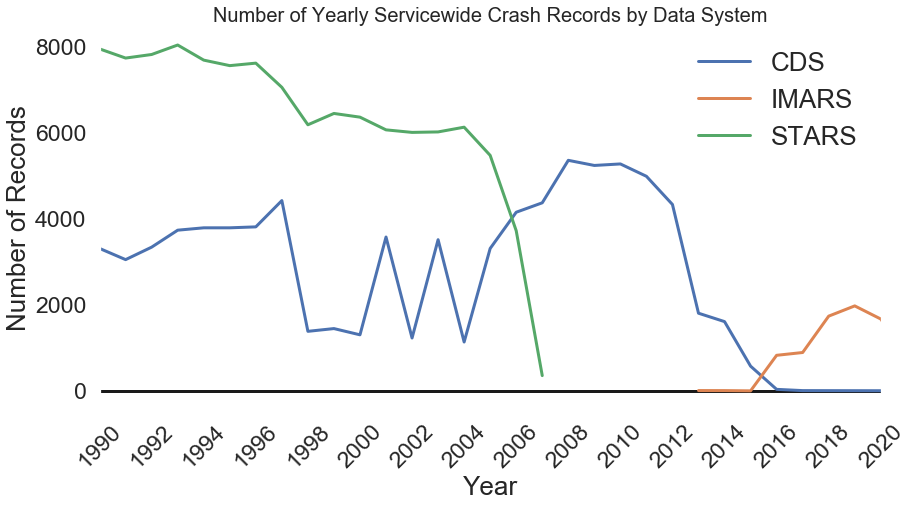

In [72]:
import matplotlib.ticker as ticker
plt.style.use('seaborn')
tick_spacing = 2 
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
fig,ax = plt.subplots(1,1, figsize=(14, 7))

ax.set_title('Number of Yearly Servicewide Crash Records by Data System', fontsize=20)
ax.plot(cds_year_count["year"], cds_year_count['INCID_NO'], label = 'CDS', linewidth = 3)
ax.plot(imars_year_count["year"], imars_year_count['INCID_NO'], label = 'IMARS', linewidth = 3)
ax.plot(stars_year_count["year"], stars_year_count['INCID_NO'], label = 'STARS', linewidth = 3)
legend = plt.legend(frameon = 1,fontsize=26)
frame = legend.get_frame()
frame.set_color('white')
frame.set_facecolor('white')
frame.set_edgecolor('black')
plt.xlim([1990,2020])
ax.grid('off')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=23, rotation=45)
ax.tick_params(axis='y', which='major', labelsize=23)
ax.tick_params(axis='both', which='minor', labelsize=23)
ax.hlines(0, xmin = 1990, xmax = 2020, linewidth = 3)
ax.set_xlabel("Year", fontsize=26)
ax.set_ylabel("Number of Records", fontsize=26)


plt.show()

In [17]:
df_year_origin=crash_df_IMR.groupby(['Data_Origin', "year"]).sum()
df_year_origin=df_year_origin.reset_index()
#df_year_origin=df_year_origin[['CATEGORY','# Crash']].sort_values(by='CATEGORY')
#df_type_grouped.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
df_year_origin

,Data_Origin,year,NUM_OCC,Non-Collision,Collision with Other Motor Vehicle,Collision with Fixed Object,Collision with Pedestrian,Collision with Bicycle,Collision with Parked Motor Vehicle,Collision with Railway Train,...,Possible Injury,Non-incapacitating Injury,Incapacitating Injury,Fatality,Unknown Injury,CRASH_TIME,LATITUDE,LONGITUDE,FATALS,INJURED
0,CDS,1940.0,0.0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1940.0,48.510740,-113.986290,0.0,0.0
1,CDS,1965.0,0.0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1645.0,0.000000,0.000000,0.0,0.0
2,CDS,1967.0,0.0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1700.0,0.000000,0.000000,0.0,0.0
3,CDS,1994.0,184.0,11,45,27,0,1,10,0,...,12.0,6.0,0.0,0.0,0.0,141150.0,0.000000,0.000000,0.0,32.0
4,CDS,1995.0,290.0,8,57,48,1,0,16,0,...,14.0,9.0,4.0,1.0,0.0,229831.0,0.000000,0.000000,2.0,44.0
5,CDS,1996.0,233.0,19,68,64,0,1,13,0,...,14.0,22.0,4.0,0.0,0.0,263779.0,0.000000,0.000000,0.0,72.0
6,CDS,1997.0,333.0,79,118,92,2,2,16,0,...,20.0,19.0,2.0,1.0,37.0,566125.0,0.000000,0.000000,3.0,88.0
7,CDS,1998.0,184.0,41,66,73,0,0,27,0,...,8.0,12.0,2.0,1.0,0.0,319174.0,93.013620,-224.741860,2.0,67.0
8,CDS,1999.0,210.0,55,96,98,2,0,32,0,...,6.0,35.0,4.0,0.0,0.0,453407.0,2353.726349,-7115.205731,2.0,105.0
9,CDS,2000.0,195.0,40,72,96,2,0,26,0,...,3.0,7.0,2.0,0.0,0.0,390145.0,2152.642269,-6304.546712,1.0,53.0


In [18]:
cds_year = df_year_origin.loc[df_year_origin['Data_Origin']=='CDS']
imars_year = df_year_origin.loc[df_year_origin['Data_Origin']=='IMARS']
stars_year = df_year_origin.loc[df_year_origin['Data_Origin']=='STARS']

In [19]:
imars_year.Fatality.sum(), stars_year.Fatality.sum(), cds_year.Fatality.sum()

(17.0, 120.0, 10.0)

In [20]:
imars_year.FATALS.sum(), stars_year.FATALS.sum(), cds_year.FATALS.sum()

(17.0, 120.0, 43.0)

In [21]:
prmp_years = [*range(2007, 2020, 1)]
prmp_fatals = [7,4,4,8,3,10,1,6,10,4,4,5,8]

prmp_df = pd.DataFrame({
    'year':prmp_years,
    'FATALS':prmp_fatals
})

In [22]:
prmp_df

,year,FATALS
0,2007,7
1,2008,4
2,2009,4
3,2010,8
4,2011,3
5,2012,10
6,2013,1
7,2014,6
8,2015,10
9,2016,4


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is dep

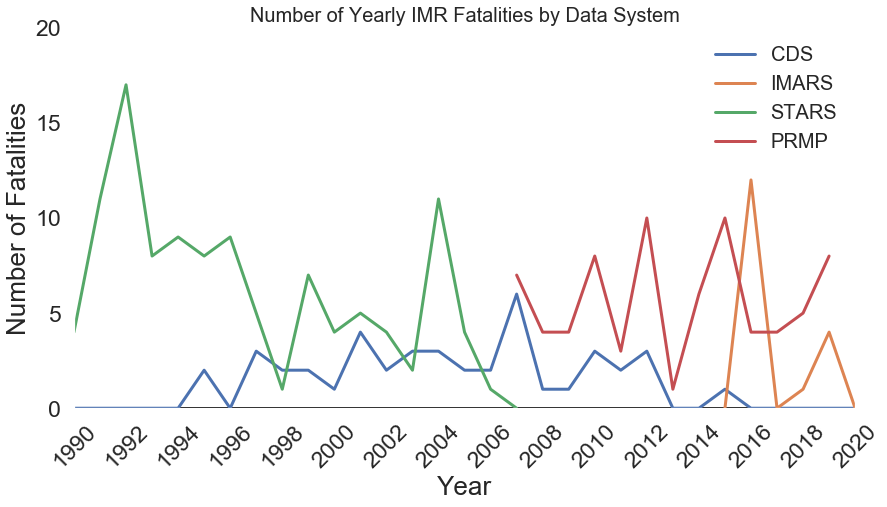

In [23]:
import matplotlib.ticker as ticker
plt.style.use('seaborn')
tick_spacing = 2 
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
fig,ax = plt.subplots(1,1, figsize=(14, 7))

ax.set_title('Number of Yearly IMR Fatalities by Data System', fontsize=20)
ax.plot(cds_year["year"], cds_year['FATALS'], label = 'CDS', linewidth = 3)
ax.plot(imars_year["year"], imars_year['FATALS'], label = 'IMARS', linewidth = 3)
ax.plot(stars_year["year"], stars_year['FATALS'], label = 'STARS', linewidth = 3)
ax.plot(prmp_df["year"], prmp_df['FATALS'], label = 'PRMP', linewidth = 3)
legend = plt.legend(frameon = 1,fontsize=20)
frame = legend.get_frame()
frame.set_color('white')
frame.set_facecolor('white')
frame.set_edgecolor('black')
plt.xlim([1990,2020])
plt.ylim([0,20])
ax.set_yticks([0,5,10,15,20])
ax.grid('off')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=23, rotation=45)
ax.tick_params(axis='y', which='major', labelsize=23)
ax.tick_params(axis='both', which='minor', labelsize=23)
ax.hlines(0, xmin = 1990, xmax = 2020, linewidth = 3)
ax.set_xlabel("Year", fontsize=26)
ax.set_ylabel("Number of Fatalities", fontsize=26)

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is dep

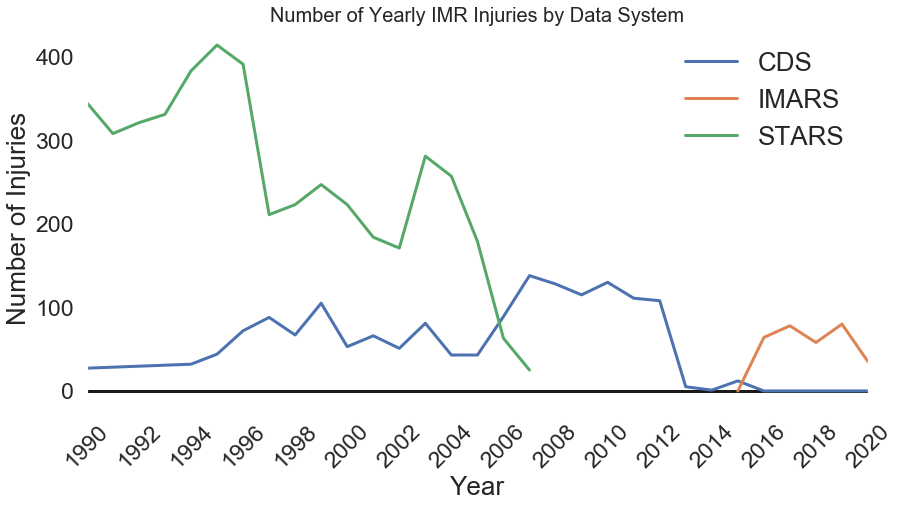

In [24]:
import matplotlib.ticker as ticker
plt.style.use('seaborn')
tick_spacing = 2 
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
fig,ax = plt.subplots(1,1, figsize=(14, 7))

ax.set_title('Number of Yearly IMR Injuries by Data System', fontsize=20)
ax.plot(cds_year["year"], cds_year['INJURED'], label = 'CDS', linewidth = 3)
ax.plot(imars_year["year"], imars_year['INJURED'], label = 'IMARS', linewidth = 3)
ax.plot(stars_year["year"], stars_year['INJURED'], label = 'STARS', linewidth = 3)
legend = plt.legend(frameon = 1,fontsize=26)
frame = legend.get_frame()
frame.set_color('white')
frame.set_facecolor('white')
frame.set_edgecolor('black')
plt.xlim([1990,2020])
ax.grid('off')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=23, rotation=45)
ax.tick_params(axis='y', which='major', labelsize=23)
ax.tick_params(axis='both', which='minor', labelsize=23)
ax.hlines(0, xmin = 1990, xmax = 2020, linewidth = 3)
ax.set_xlabel("Year", fontsize=26)
ax.set_ylabel("Number of Injuries", fontsize=26)


plt.show()

In [25]:
df_year_origin_count=crash_df_IMR[['Data_Origin', "year",'INCID_NO']].groupby(['Data_Origin', "year"]).count()
df_year_origin_count=df_year_origin_count.reset_index()

cds_year_count = df_year_origin_count.loc[df_year_origin_count['Data_Origin']=='CDS']
imars_year_count = df_year_origin_count.loc[df_year_origin_count['Data_Origin']=='IMARS']
stars_year_count = df_year_origin_count.loc[df_year_origin_count['Data_Origin']=='STARS']

#df_year_origin=df_year_origin[['CATEGORY','# Crash']].sort_values(by='CATEGORY')
#df_type_grouped.rename(columns={'# Crash': 'number_of_crashes'}, inplace=True)
#df_year_origin_count

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is dep

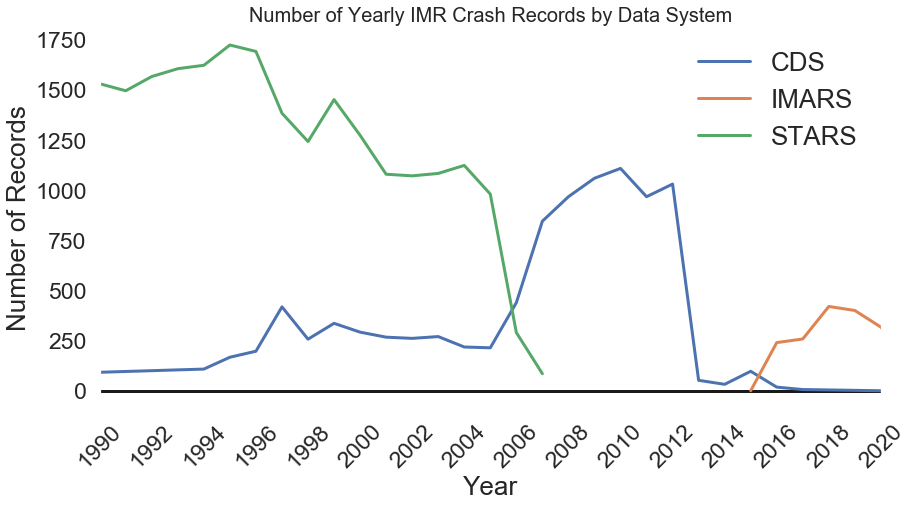

In [26]:
import matplotlib.ticker as ticker
plt.style.use('seaborn')
tick_spacing = 2 
sns.set(rc={'axes.facecolor':'1', 'figure.facecolor':'white', 'patch.linewidth': 0.0})
fig,ax = plt.subplots(1,1, figsize=(14, 7))

ax.set_title('Number of Yearly IMR Crash Records by Data System', fontsize=20)
ax.plot(cds_year_count["year"], cds_year_count['INCID_NO'], label = 'CDS', linewidth = 3)
ax.plot(imars_year_count["year"], imars_year_count['INCID_NO'], label = 'IMARS', linewidth = 3)
ax.plot(stars_year_count["year"], stars_year_count['INCID_NO'], label = 'STARS', linewidth = 3)
legend = plt.legend(frameon = 1,fontsize=26)
frame = legend.get_frame()
frame.set_color('white')
frame.set_facecolor('white')
frame.set_edgecolor('black')
plt.xlim([1990,2020])
ax.grid('off')
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax.tick_params(axis='x', which='major', labelsize=23, rotation=45)
ax.tick_params(axis='y', which='major', labelsize=23)
ax.tick_params(axis='both', which='minor', labelsize=23)
ax.hlines(0, xmin = 1990, xmax = 2020, linewidth = 3)
ax.set_xlabel("Year", fontsize=26)
ax.set_ylabel("Number of Records", fontsize=26)


plt.show()

In [27]:
crash_df.head()

,INCID_NO,CASENUM,NUM_OCC,Non-Collision,Collision with Other Motor Vehicle,Collision with Fixed Object,Collision with Pedestrian,Collision with Bicycle,Collision with Parked Motor Vehicle,Collision with Railway Train,...,LONGITUDE,FATALS,INJURED,Data_Origin,UNIT_NAME,REGION,UNIT_TYPE,_merge,day_of_week,year
0,ABLI9000000001,0,0.0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,STARS,Abraham Lincoln Birthplace National Historical...,SE,National Historical Park,both,<bound method PandasDelegate._add_delegate_acc...,1990.0
1,ABLI9100000001,0,2.0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,STARS,Abraham Lincoln Birthplace National Historical...,SE,National Historical Park,both,<bound method PandasDelegate._add_delegate_acc...,1991.0
2,ACAD0000000003,0,1.0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,STARS,Acadia National Park,NE,National Park,both,<bound method PandasDelegate._add_delegate_acc...,2000.0
3,ACAD0000000014,0,2.0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,STARS,Acadia National Park,NE,National Park,both,<bound method PandasDelegate._add_delegate_acc...,2000.0
4,ACAD0000000026,0,1.0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,STARS,Acadia National Park,NE,National Park,both,<bound method PandasDelegate._add_delegate_acc...,2000.0


In [28]:
crash_df.shape

(212957, 35)

In [29]:
crash_df.REGION.value_counts()

NC    34978
IM    34876
SE    21212
PW    21155
NE    19159
NT     8464
MW     2681
AK      609
Name: REGION, dtype: int64

In [30]:
initial=crash_df.loc[(crash_df['year']>1989)&(crash_df['year']<2021)]


In [31]:
initial.shape

(205250, 35)

In [32]:
initial = initial.loc[initial['REGION']=='IM']

In [33]:
initial.shape

(33601, 35)

In [34]:
# assuming there is a column called data origin
stars=initial.loc[(initial['Data_Origin']=='STARS')]
cds=initial.loc[(initial['Data_Origin']=='CDS')]
imars=initial.loc[(initial['Data_Origin']=='IMARS')]

In [35]:
numberofStars = len(pd.unique(stars['INCID_NO']))
print("No.of.crashes in STARS :", numberofStars)

numberofCds = len(pd.unique(cds['INCID_NO']))
print("No.of.crashes in CDS :", numberofCds)

numberofImars = len(pd.unique(imars['INCID_NO']))
print("No.of.crashes in IMARS :", numberofImars)

No.of.crashes in STARS : 22187
No.of.crashes in CDS : 9650
No.of.crashes in IMARS : 1631


In [36]:
numberofStarsParks = len(pd.unique(stars['PARK_ALPHA']))
print("No.of.Parks in STARS :", numberofStarsParks)

numberofCdsParks = len(pd.unique(cds['PARK_ALPHA']))
print("No.of.Parks in CDS :", numberofCdsParks)

numberofImarsParks = len(pd.unique(imars['PARK_ALPHA']))
print("No.of.Parks in IMARS :", numberofImarsParks)

No.of.Parks in STARS : 55
No.of.Parks in CDS : 31
No.of.Parks in IMARS : 38


In [44]:
initial['Inj_Fat'] = (initial['INJURED']+initial['FATALS'])

In [48]:
intial_reduced=initial.loc[initial['Inj_Fat']>0][['PARK_ALPHA','year','INCID_NO']]
yearly_crashes=intial_reduced.groupby(['PARK_ALPHA','year']).count()
yearly_crashes=yearly_crashes.reset_index()
#yearly_crashes = yearly_crashes.groupby(['PARK_ALPHA']).sum()
#yearly_crashes.INCID_NO.sum()
yearly_crashes

,PARK_ALPHA,year,INCID_NO
0,AMIS,1990.0,2
1,AMIS,1994.0,1
2,AMIS,1995.0,1
3,AMIS,1996.0,4
4,AMIS,1998.0,3
...,...,...,...
451,ZION,2008.0,9
452,ZION,2009.0,12
453,ZION,2010.0,3
454,ZION,2015.0,1


In [49]:
yearly_crashes['Count'] = yearly_crashes['INCID_NO']
yearly_crashes['SUM'] = yearly_crashes['INCID_NO']

crash_dataset = (yearly_crashes.groupby(['PARK_ALPHA'])
    .agg({'Count':'count', 'SUM': 'sum'})
    .reset_index()
)

In [50]:
crash_dataset['average yearly crashes']= crash_dataset['SUM']/crash_dataset['Count']

In [51]:
crash_dataset.sort_values(by=['average yearly crashes'],ascending=False)

,PARK_ALPHA,Count,SUM,average yearly crashes
44,YELL,28,1488,53.142857
38,ROMO,27,530,19.629630
27,GRTE,27,453,16.777778
39,SAGU,26,400,15.384615
25,GRCA,26,346,13.307692
3,BIBE,22,226,10.272727
45,ZION,21,144,6.857143
23,GLAC,26,148,5.692308
26,GRSA,6,26,4.333333
30,MEVE,23,99,4.304348


In [39]:
initial.columns

Index(['INCID_NO', 'CASENUM', 'NUM_OCC', 'Non-Collision',
       'Collision with Other Motor Vehicle', 'Collision with Fixed Object',
       'Collision with Pedestrian', 'Collision with Bicycle',
       'Collision with Parked Motor Vehicle', 'Collision with Railway Train',
       'Collision with Animal', 'Collision with Other Object',
       'Collision with Unknown', 'Other Accident Class', 'No Injury',
       'Possible Injury', 'Non-incapacitating Injury', 'Incapacitating Injury',
       'Fatality', 'Unknown Injury', 'PARK_ALPHA', 'STATE', 'CRASH_DATE',
       'CRASH_TIME', 'LATITUDE', 'LONGITUDE', 'FATALS', 'INJURED',
       'Data_Origin', 'UNIT_NAME', 'REGION', 'UNIT_TYPE', '_merge',
       'day_of_week', 'year'],
      dtype='object')

In [40]:
print("Number of people not injured in crash :", initial['No Injury'].sum())
print("Number of crashes with no injury :", len(initial.loc[initial['No Injury']>0]))

print("Number of people Possible Injury in crash :", initial['Possible Injury'].sum())
print("Number of crashes with Possible Injury :", len(initial.loc[initial['Possible Injury']>0]))

print("Number of people Non-incapacitating Injury in crash :", initial['Non-incapacitating Injury'].sum())
print("Number of crashes with Non-incapacitating Injury :", len(initial.loc[initial['Non-incapacitating Injury']>0]))

print("Number of people Incapacitating Injury in crash :", initial['Incapacitating Injury'].sum())
print("Number of crashes with Incapacitating Injury :", len(initial.loc[initial['Incapacitating Injury']>0]))

print("Number of people Fatality in crash :", initial['Fatality'].sum())
print("Number of crashes with Fatality :", len(initial.loc[initial['Fatality']>0]))


Number of people not injured in crash : 50123.0
Number of crashes with no injury : 23686
Number of people Possible Injury in crash : 2146.0
Number of crashes with Possible Injury : 1574
Number of people Non-incapacitating Injury in crash : 2563.0
Number of crashes with Non-incapacitating Injury : 1864
Number of people Incapacitating Injury in crash : 861.0
Number of crashes with Incapacitating Injury : 700
Number of people Fatality in crash : 137.0
Number of crashes with Fatality : 117


In [41]:
print("Number of people with an injury in crash :", initial['INJURED'].sum())
print("Number of crashes with an injury :", len(initial.loc[initial['INJURED']>0]))

print("Number of people Fatality in crash :", initial['FATALS'].sum())
print("Number of crashes with Fatality :", len(initial.loc[initial['FATALS']>0]))


Number of people with an injury in crash : 6454.0
Number of crashes with an injury : 4367
Number of people Fatality in crash : 170.0
Number of crashes with Fatality : 145


In [1]:
6454+170, 4367+145

(6624, 4512)

In [43]:
intial_reduced_fatalities=initial[['PARK_ALPHA', 'INJURED','FATALS']]
fatal_crashes=intial_reduced_fatalities.groupby(['PARK_ALPHA']).sum()
fatal_crashes=fatal_crashes.reset_index()
fatal_crashes['AvPerYear']=(fatal_crashes['INJURED']+fatal_crashes['FATALS'])/30
fatal_crashes.sort_values(by=['FATALS'],ascending=False)

,PARK_ALPHA,INJURED,FATALS
58,YELL,2165.0,53.0
49,SAGU,560.0,19.0
3,BIBE,276.0,15.0
30,GRTE,675.0,10.0
59,ZION,187.0,10.0
48,ROMO,796.0,9.0
26,GLAC,195.0,9.0
28,GRCA,526.0,7.0
35,LAMR,103.0,7.0
17,COLM,111.0,6.0


In [44]:
fatal_crashes.FATALS.sum()

170.0

In [45]:
initial.columns

Index(['INCID_NO', 'CASENUM', 'NUM_OCC', 'Non-Collision',
       'Collision with Other Motor Vehicle', 'Collision with Fixed Object',
       'Collision with Pedestrian', 'Collision with Bicycle',
       'Collision with Parked Motor Vehicle', 'Collision with Railway Train',
       'Collision with Animal', 'Collision with Other Object',
       'Collision with Unknown', 'Other Accident Class', 'No Injury',
       'Possible Injury', 'Non-incapacitating Injury', 'Incapacitating Injury',
       'Fatality', 'Unknown Injury', 'PARK_ALPHA', 'STATE', 'CRASH_DATE',
       'CRASH_TIME', 'LATITUDE', 'LONGITUDE', 'FATALS', 'INJURED',
       'Data_Origin', 'UNIT_NAME', 'REGION', 'UNIT_TYPE', '_merge',
       'day_of_week', 'year'],
      dtype='object')

In [46]:
col_names = ['Non-Collision',
       'Collision with Other Motor Vehicle', 'Collision with Fixed Object',
       'Collision with Pedestrian', 'Collision with Bicycle',
       'Collision with Parked Motor Vehicle', 'Collision with Railway Train',
       'Collision with Animal', 'Collision with Other Object',
       'Collision with Unknown', 'Other Accident Class']
col_values = []

for x in col_names:
    new_val = initial[x].sum()
    col_values.append(new_val)

In [47]:
col_names

['Non-Collision',
 'Collision with Other Motor Vehicle',
 'Collision with Fixed Object',
 'Collision with Pedestrian',
 'Collision with Bicycle',
 'Collision with Parked Motor Vehicle',
 'Collision with Railway Train',
 'Collision with Animal',
 'Collision with Other Object',
 'Collision with Unknown',
 'Other Accident Class']

In [48]:
col_values

[4045, 10260, 8030, 177, 102, 3145, 5, 5008, 1540, 612, 662]

In [49]:
crash_class_df = pd.DataFrame({
    'Crash Class':col_names,
    'Number of crashes':col_values
})

crash_class_df['% of crashes'] = crash_class_df['Number of crashes']/crash_class_df['Number of crashes'].sum()*100

In [50]:
crash_class_df.sort_values(by=['Number of crashes'],ascending=False)

,Crash Class,Number of crashes,% of crashes
1,Collision with Other Motor Vehicle,10260,30.548443
2,Collision with Fixed Object,8030,23.908772
7,Collision with Animal,5008,14.910975
0,Non-Collision,4045,12.043709
5,Collision with Parked Motor Vehicle,3145,9.364021
8,Collision with Other Object,1540,4.585244
10,Other Accident Class,662,1.971059
9,Collision with Unknown,612,1.822188
3,Collision with Pedestrian,177,0.527005
4,Collision with Bicycle,102,0.303698


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


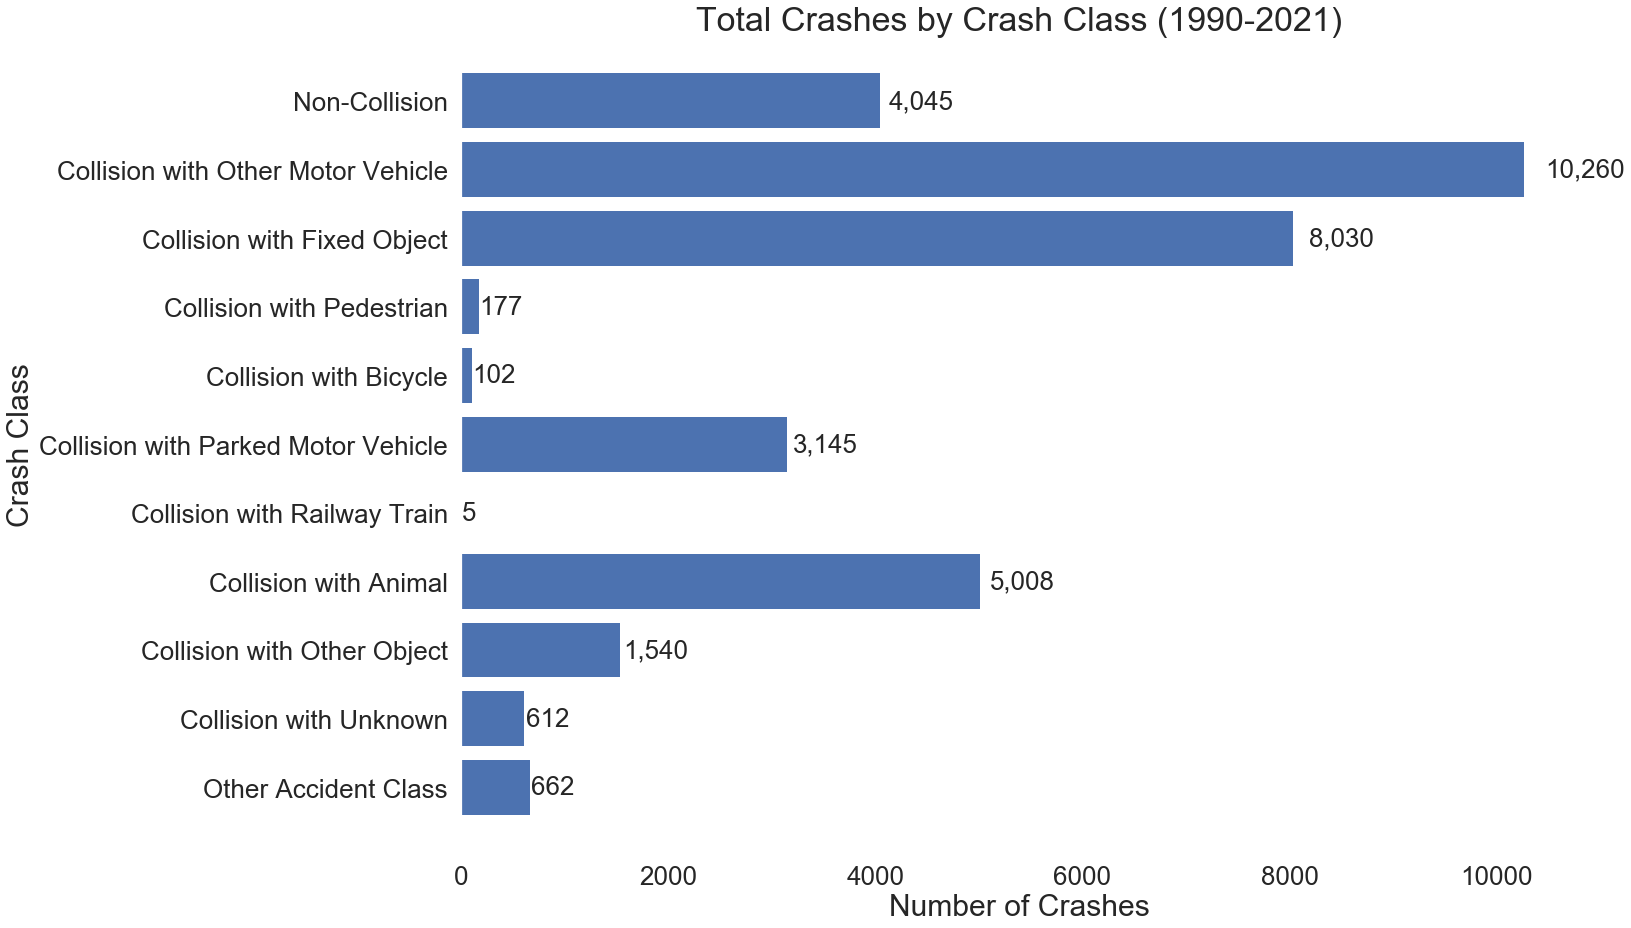

In [51]:
#template code taken from Waze data
bar_labels = []
for x in crash_class_df['Number of crashes'].value_counts().index[:10]:
    bar_labels.append(x)

fig, ax = plt.subplots(1,1,figsize=(20,15))
#ax.set_xticks(fontsize=26, rotation = 90)
#ax.set_yticks(fontsize=26)
ax.set_title('Total Crashes by Crash Class (1990-2021)',fontsize= 34) # title of plot
bars = ax.barh(width = crash_class_df['Number of crashes'], y = crash_class_df['Crash Class'])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Crashes',fontsize = 30) #xlabel
ax.set_ylabel('Crash Class', fontsize = 30)#ylabel
ax.tick_params(axis='x', which='major', labelsize=26)
ax.tick_params(axis='y', which='major', labelsize=26)
for bar in bars:
    width = bar.get_width() #Previously we got the height
    label = '{:,}'.format(width)
    label_y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width*1.02, label_y_pos, s='{:,}'.format(width), va='center',fontsize=26)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(18)

ax.grid("off")
plt.show()

In [52]:
172+99

271

In [53]:
intial_reduced_class=initial[['PARK_ALPHA', 'Non-Collision',
       'Collision with Other Motor Vehicle', 'Collision with Fixed Object',
       'Collision with Pedestrian', 'Collision with Bicycle',
       'Collision with Parked Motor Vehicle', 'Collision with Railway Train',
       'Collision with Animal', 'Collision with Other Object',
       'Collision with Unknown', 'Other Accident Class']]
crash_classes=intial_reduced_class.groupby(['PARK_ALPHA']).sum()
crash_classes=crash_classes.reset_index()
crash_classes.sort_values(by=['Collision with Other Motor Vehicle'],ascending=False)

,PARK_ALPHA,Non-Collision,Collision with Other Motor Vehicle,Collision with Fixed Object,Collision with Pedestrian,Collision with Bicycle,Collision with Parked Motor Vehicle,Collision with Railway Train,Collision with Animal,Collision with Other Object,Collision with Unknown,Other Accident Class
58,YELL,1278,3736,2209,68,31,776,1,1891,495,183,125
28,GRCA,186,1514,791,23,14,487,1,467,99,89,237
48,ROMO,339,1265,1243,18,9,306,0,330,182,45,11
30,GRTE,461,982,507,15,10,215,0,1206,148,58,136
59,ZION,146,450,401,13,7,203,0,139,67,28,11
26,GLAC,206,426,570,11,7,176,0,170,105,41,29
39,MEVE,119,331,324,3,1,242,0,286,56,15,1
49,SAGU,285,280,614,0,11,27,0,46,97,11,5
7,BRCA,50,227,93,0,0,122,1,63,5,9,3
27,GLCA,105,216,94,10,2,227,0,8,37,34,61
